<font face="Georgia" size="3" color="#007acc">
   <div align="center">
    <h1><strong>Tecnológico de Monterrey</strong></h1>
        <h1><strong>Campus Querétaro</strong></h1>
        <h1>Analítica de datos y herramientas de inteligencia artificial I</h1>
        <h3>Grupo 101</h3>
    <h4><strong>Actividad 3 (Valores Atípicos por Dataframe)</strong></h4>
           <h4>Ana Michele Hay Robles</h4>
           <h4>A01378047</h4>
    </div>

</font>
</div>

# INSTRUCCIONES

- Utilizar el repositorio con el nombre: Valores Atípicos
- Agregar el archivo: Gastos y costos 20-23.xlsx
- Aplicar métodos para reemplazar valores nulos en el dataframe “2023”
- Aplicar métodos (Desviación Estándar y Rango Intercuartílico) para eliminar Outliers, comprobar con diagramas de caja de cada dataframe
- Crear el archivo en Google COLAB, respaldarlo en GitHub, y agregar un archivo .csv por cada dataframe procesada.
- Subir el link del repositorio en CANVAS para “Evaluación”

In [100]:

# Importamos las librerias pandas, numpy y matplotlib respectivamente
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [101]:
# Creamos una función que lea el archivo xslx y que reciba como parámetro el path, numero de hoja y el num_skip_rows

def read_xlsx(path, sheet, num_skip_rows):
    df = pd.read_excel(path, sheet_name=sheet, skiprows=num_skip_rows)
    return df


path = "/Users/michelehay/Documents/7MO UNI/actividad_2_valores_nulo/valores_atipicos/Gastos y costos 20-23.xlsx"
df_2020 = read_xlsx(path, '2020', 5)
df_2021 = read_xlsx(path, '2021', 3)
df_2022 = read_xlsx(path, '2022', 3)
df_2023 = read_xlsx(path, '2023', 3)
lista_df = [df_2020, df_2021, df_2022, df_2023]

In [102]:
for i in lista_df:
    print(i.columns)

Index(['FECHA', 'FOLIO', 'UUID', 'RFC', 'PROVEEDOR', 'TIPO GASTO', 'GASTO',
       'DESCRIPCION', 'TC', 'IMPORTE', 'IVA', 'RET ISR', 'RET IVA', 'TOTAL MX',
       'TOTAL SAT', 'TIPO', 'STATUS', 'POLIZA', 'Columna1'],
      dtype='object')
Index(['FECHA', 'FOLIO', 'UUID', 'RFC', 'PROVEEDOR', 'TIPO GASTO',
       'DESCRIPCION', 'MP', 'TC', 'IMPORTE', 'IVA', 'RET ISR', 'RET IVA',
       'TOTAL MX', 'TOTAL SAT', 'TIPO', 'STATUS', 'POLIZA'],
      dtype='object')
Index(['Fecha', 'Folio', 'UUID', 'RFC', 'Proveedor', 'TIPO GASTO',
       'Descripción', 'MP', 'TC', 'Importe', 'IVA', 'RET ISR', 'RET IVA',
       'Otros', 'TOTAL MX', 'TOTAL SAT', 'Tipo', 'Status', 'Poliza'],
      dtype='object')
Index(['Fecha', 'Folio', 'UUID', 'RFC', 'Proveedor', 'TIPO GASTO',
       'Descripción', 'MP', 'FP', 'TC', 'Importe', 'IVA', 'RET ISR', 'RET IVA',
       'Otros', 'TOTAL MX', 'TOTAL SAT', 'Tipo', 'Status', 'Poliza'],
      dtype='object')


In [103]:
# 3. Aplicar métodos para reemplazar valores nulos en el dataframe “2023”

df_2023.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397 entries, 0 to 396
Data columns (total 20 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Fecha        397 non-null    datetime64[ns]
 1   Folio        384 non-null    object        
 2   UUID         397 non-null    object        
 3   RFC          397 non-null    object        
 4   Proveedor    397 non-null    object        
 5   TIPO GASTO   389 non-null    object        
 6   Descripción  397 non-null    object        
 7   MP           326 non-null    object        
 8   FP           326 non-null    float64       
 9   TC           397 non-null    float64       
 10  Importe      397 non-null    float64       
 11  IVA          397 non-null    float64       
 12  RET ISR      397 non-null    float64       
 13  RET IVA      397 non-null    float64       
 14  Otros        0 non-null      float64       
 15  TOTAL MX     397 non-null    float64       
 16  TOTAL SA

## 3. Aplicar métodos para reemplazar valores nulos en el dataframe “2023”

In [104]:
# En la primera columna se imprime el nombre, en la segunda columna se
# imprime el df.dtypes para ver el tipo de dato que tiene la columna y
# en otra columna se imprime el df.isnull().sum() para ver la cantidad de
# valores nulos que tiene la columna

def info_df(df_2023):
    for i in df_2023.columns:
        # Definir el ancho de cada columna
        column_width = 15

        # Imprimir la información con alineación ajustada
        print(
            f"Columna: {i.ljust(column_width)} Tipo de dato: {str(df_2023[i].dtypes).ljust(column_width)} Cantidad de valores nulos: {str(df_2023[i].isnull().sum()).ljust(column_width)}")
        
info_df(df_2023)

Columna: Fecha           Tipo de dato: datetime64[ns]  Cantidad de valores nulos: 0              
Columna: Folio           Tipo de dato: object          Cantidad de valores nulos: 13             
Columna: UUID            Tipo de dato: object          Cantidad de valores nulos: 0              
Columna: RFC             Tipo de dato: object          Cantidad de valores nulos: 0              
Columna: Proveedor       Tipo de dato: object          Cantidad de valores nulos: 0              
Columna: TIPO GASTO      Tipo de dato: object          Cantidad de valores nulos: 8              
Columna: Descripción     Tipo de dato: object          Cantidad de valores nulos: 0              
Columna: MP              Tipo de dato: object          Cantidad de valores nulos: 71             
Columna: FP              Tipo de dato: float64         Cantidad de valores nulos: 71             
Columna: TC              Tipo de dato: float64         Cantidad de valores nulos: 0              
Columna: Importe    

In [105]:
# Reemplazar los valores nulos por el promedio de las columnas numéricas

# Reemplazamos los valores nulos por el promedio de las columnas numéricas
df_2023['FP'] = df_2023['FP'].fillna(df_2023['FP'].mean())

# Reemplazamos los valores nulos por la moda de un valor categórico
df_2023['Folio'] = df_2023['Folio'].fillna(df_2023['Folio'].mode()[0])
df_2023['TIPO GASTO'] = df_2023['TIPO GASTO'].fillna(df_2023['TIPO GASTO'].mode()[0])
df_2023['MP'] = df_2023['MP'].fillna(df_2023['MP'].mode()[0])
df_2023['Poliza'] = df_2023['Poliza'].fillna(df_2023['Poliza'].mode()[0])

# Reemplazamos la columna de Otros por 0 dado que no hay ningún valor
df_2023['Otros'] = df_2023['Otros'].fillna(0)


info_df(df_2023)

Columna: Fecha           Tipo de dato: datetime64[ns]  Cantidad de valores nulos: 0              
Columna: Folio           Tipo de dato: object          Cantidad de valores nulos: 0              
Columna: UUID            Tipo de dato: object          Cantidad de valores nulos: 0              
Columna: RFC             Tipo de dato: object          Cantidad de valores nulos: 0              
Columna: Proveedor       Tipo de dato: object          Cantidad de valores nulos: 0              
Columna: TIPO GASTO      Tipo de dato: object          Cantidad de valores nulos: 0              
Columna: Descripción     Tipo de dato: object          Cantidad de valores nulos: 0              
Columna: MP              Tipo de dato: object          Cantidad de valores nulos: 0              
Columna: FP              Tipo de dato: float64         Cantidad de valores nulos: 0              
Columna: TC              Tipo de dato: float64         Cantidad de valores nulos: 0              
Columna: Importe    

## 4. Aplicar métodos (Desviación Estándar y Rango Intercuartílico) para eliminar Outliers, comprobar con diagramas de caja de cada dataframe

### Desviación Estándar para df_2020

In [106]:
info_df(df_2020)

Columna: FECHA           Tipo de dato: datetime64[ns]  Cantidad de valores nulos: 0              
Columna: FOLIO           Tipo de dato: object          Cantidad de valores nulos: 189            
Columna: UUID            Tipo de dato: object          Cantidad de valores nulos: 0              
Columna: RFC             Tipo de dato: object          Cantidad de valores nulos: 0              
Columna: PROVEEDOR       Tipo de dato: object          Cantidad de valores nulos: 0              
Columna: TIPO GASTO      Tipo de dato: object          Cantidad de valores nulos: 0              
Columna: GASTO           Tipo de dato: object          Cantidad de valores nulos: 2502           
Columna: DESCRIPCION     Tipo de dato: object          Cantidad de valores nulos: 0              
Columna: TC              Tipo de dato: float64         Cantidad de valores nulos: 391            
Columna: IMPORTE         Tipo de dato: float64         Cantidad de valores nulos: 34             
Columna: IVA        

In [107]:
def stdev_delete_outliers(df, columns):
    '''
    Elimina los valores atípicos de un dataframe
    :param df: dataframe
    :param columns: lista de columnas
    :return: dataframe sin valores atípicos
    '''
    num_columns = len(columns)
    
    # Configura la disposición de subtramas en una fila con dos columnas
    fig, axes = plt.subplots(1, 2 * num_columns, figsize=(15, 5))
    
    for index, i in enumerate(columns):
        # Imprime el boxplot inicial en la primera columna
        axes[index].boxplot(df[i])
        axes[index].set_title(f'Initial {i}')
        
        # Filtra los outliers
        df = df[np.abs(df[i] - df[i].mean()) <= (3 * df[i].std())]
        
        # Imprime el boxplot final en la segunda columna
        axes[num_columns + index].boxplot(df[i])
        axes[num_columns + index].set_title(f'Final {i}')
    
    # Ajusta el diseño de las subtramas
    plt.tight_layout()
    plt.show()
    
    return df

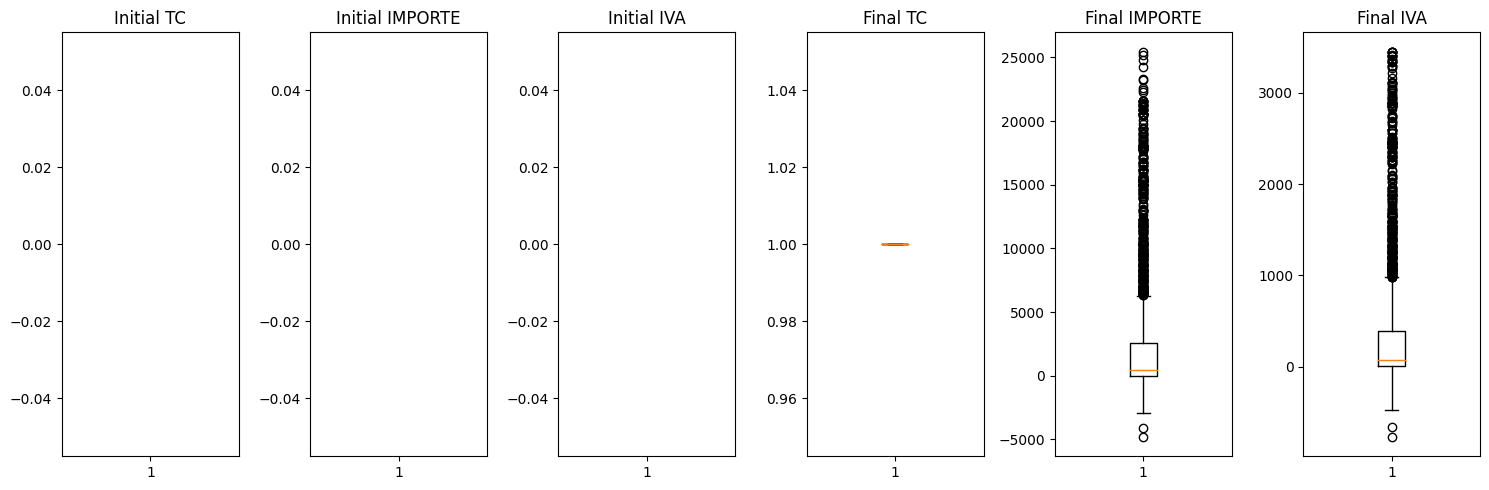

Columna: FECHA           Tipo de dato: datetime64[ns]  Cantidad de valores nulos: 0              
Columna: FOLIO           Tipo de dato: object          Cantidad de valores nulos: 130            
Columna: UUID            Tipo de dato: object          Cantidad de valores nulos: 0              
Columna: RFC             Tipo de dato: object          Cantidad de valores nulos: 0              
Columna: PROVEEDOR       Tipo de dato: object          Cantidad de valores nulos: 0              
Columna: TIPO GASTO      Tipo de dato: object          Cantidad de valores nulos: 0              
Columna: GASTO           Tipo de dato: object          Cantidad de valores nulos: 1823           
Columna: DESCRIPCION     Tipo de dato: object          Cantidad de valores nulos: 0              
Columna: TC              Tipo de dato: float64         Cantidad de valores nulos: 0              
Columna: IMPORTE         Tipo de dato: float64         Cantidad de valores nulos: 0              
Columna: IVA        

In [108]:
df_2020 = stdev_delete_outliers(df_2020, ['TC', 'IMPORTE', 'IVA'])
info_df(df_2020)

### Rango Intercuantílico para df_2022

In [109]:
def quantiles_delete_outliers(df, columns):
    num_columns = len(columns)

    # Configura la disposición de subtramas en una fila con dos columnas
    fig, axes = plt.subplots(1, 2 * num_columns, figsize=(15, 5))

    for index, i in enumerate(columns):
        # Imprime el boxplot inicial en la primera columna
        axes[index].boxplot(df[i])
        axes[index].set_title(f'Initial {i} Boxplot')

        # Filtra los outliers
        q1 = df[i].quantile(0.25)
        q3 = df[i].quantile(0.75)
        iqr = q3 - q1
        lower_bound = q1 - 1.5 * iqr
        upper_bound = q3 + 1.5 * iqr
        df = df[(df[i] >= lower_bound) & (df[i] <= upper_bound)]

        # Imprime el boxplot final en la segunda columna
        axes[num_columns + index].boxplot(df[i])
        axes[num_columns + index].set_title(f'Final {i} Boxplot')

    # Ajusta el diseño de las subtramas
    plt.tight_layout()
    plt.show()

    return df


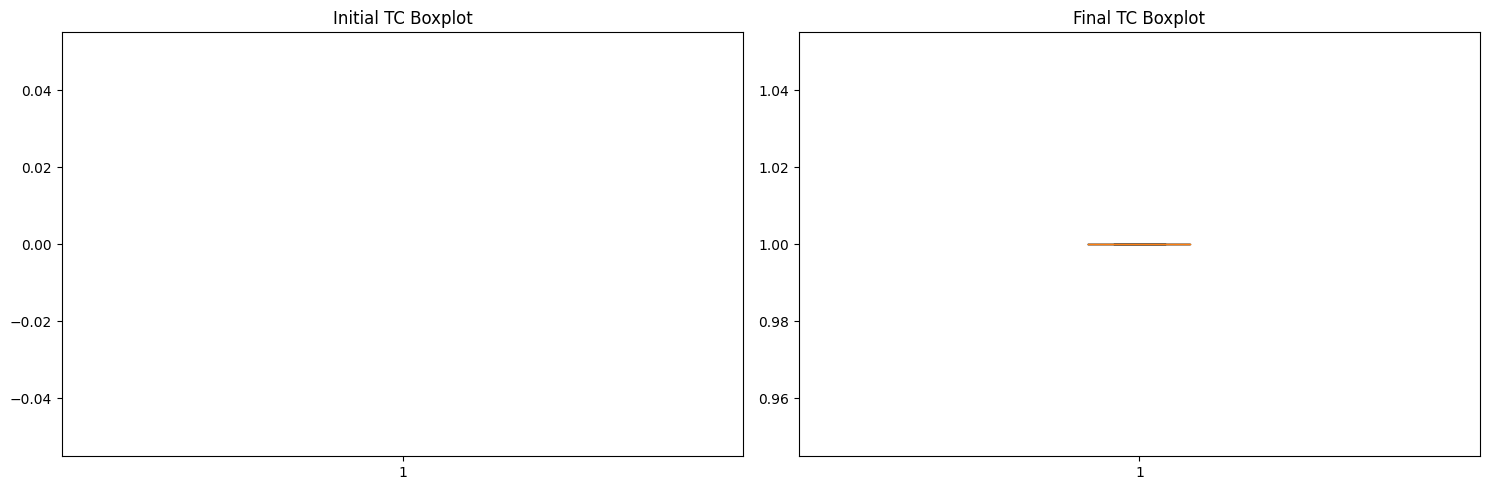

Columna: Fecha           Tipo de dato: datetime64[ns]  Cantidad de valores nulos: 0              
Columna: Folio           Tipo de dato: object          Cantidad de valores nulos: 77             
Columna: UUID            Tipo de dato: object          Cantidad de valores nulos: 0              
Columna: RFC             Tipo de dato: object          Cantidad de valores nulos: 0              
Columna: Proveedor       Tipo de dato: object          Cantidad de valores nulos: 0              
Columna: TIPO GASTO      Tipo de dato: object          Cantidad de valores nulos: 0              
Columna: Descripción     Tipo de dato: object          Cantidad de valores nulos: 0              
Columna: MP              Tipo de dato: object          Cantidad de valores nulos: 360            
Columna: TC              Tipo de dato: float64         Cantidad de valores nulos: 0              
Columna: Importe         Tipo de dato: float64         Cantidad de valores nulos: 0              
Columna: IVA        

In [113]:
df_2022 = quantiles_delete_outliers(df_2022, ['TC'])
info_df(df_2022)

# Usamos métodos para reemplazar los valores categóricos restantes

### 2023

In [114]:
# A este df_2023 No le falta nada
info_df(df_2023)

Columna: Fecha           Tipo de dato: datetime64[ns]  Cantidad de valores nulos: 0              
Columna: Folio           Tipo de dato: object          Cantidad de valores nulos: 0              
Columna: UUID            Tipo de dato: object          Cantidad de valores nulos: 0              
Columna: RFC             Tipo de dato: object          Cantidad de valores nulos: 0              
Columna: Proveedor       Tipo de dato: object          Cantidad de valores nulos: 0              
Columna: TIPO GASTO      Tipo de dato: object          Cantidad de valores nulos: 0              
Columna: Descripción     Tipo de dato: object          Cantidad de valores nulos: 0              
Columna: MP              Tipo de dato: object          Cantidad de valores nulos: 0              
Columna: FP              Tipo de dato: float64         Cantidad de valores nulos: 0              
Columna: TC              Tipo de dato: float64         Cantidad de valores nulos: 0              
Columna: Importe    

### 2022

In [115]:
info_df(df_2022)

Columna: Fecha           Tipo de dato: datetime64[ns]  Cantidad de valores nulos: 0              
Columna: Folio           Tipo de dato: object          Cantidad de valores nulos: 77             
Columna: UUID            Tipo de dato: object          Cantidad de valores nulos: 0              
Columna: RFC             Tipo de dato: object          Cantidad de valores nulos: 0              
Columna: Proveedor       Tipo de dato: object          Cantidad de valores nulos: 0              
Columna: TIPO GASTO      Tipo de dato: object          Cantidad de valores nulos: 0              
Columna: Descripción     Tipo de dato: object          Cantidad de valores nulos: 0              
Columna: MP              Tipo de dato: object          Cantidad de valores nulos: 360            
Columna: TC              Tipo de dato: float64         Cantidad de valores nulos: 0              
Columna: Importe         Tipo de dato: float64         Cantidad de valores nulos: 0              
Columna: IVA        

In [116]:
# Para el df_2022 aplicamos bfill para rellenar los valores nulos restantes
df_2022 = df_2022.bfill(axis=0)

# Verificamos que ya no hay valores nulos
info_df(df_2022)

Columna: Fecha           Tipo de dato: datetime64[ns]  Cantidad de valores nulos: 0              
Columna: Folio           Tipo de dato: object          Cantidad de valores nulos: 0              
Columna: UUID            Tipo de dato: object          Cantidad de valores nulos: 0              
Columna: RFC             Tipo de dato: object          Cantidad de valores nulos: 0              
Columna: Proveedor       Tipo de dato: object          Cantidad de valores nulos: 0              
Columna: TIPO GASTO      Tipo de dato: object          Cantidad de valores nulos: 0              
Columna: Descripción     Tipo de dato: object          Cantidad de valores nulos: 0              
Columna: MP              Tipo de dato: object          Cantidad de valores nulos: 0              
Columna: TC              Tipo de dato: float64         Cantidad de valores nulos: 0              
Columna: Importe         Tipo de dato: float64         Cantidad de valores nulos: 0              
Columna: IVA        

### 2021

In [117]:
info_df(df_2021)

Columna: FECHA           Tipo de dato: datetime64[ns]  Cantidad de valores nulos: 0              
Columna: FOLIO           Tipo de dato: object          Cantidad de valores nulos: 147            
Columna: UUID            Tipo de dato: object          Cantidad de valores nulos: 0              
Columna: RFC             Tipo de dato: object          Cantidad de valores nulos: 0              
Columna: PROVEEDOR       Tipo de dato: object          Cantidad de valores nulos: 0              
Columna: TIPO GASTO      Tipo de dato: object          Cantidad de valores nulos: 0              
Columna: DESCRIPCION     Tipo de dato: object          Cantidad de valores nulos: 0              
Columna: MP              Tipo de dato: object          Cantidad de valores nulos: 654            
Columna: TC              Tipo de dato: float64         Cantidad de valores nulos: 0              
Columna: IMPORTE         Tipo de dato: float64         Cantidad de valores nulos: 0              
Columna: IVA        

In [118]:
# Aplicamos ffill para rellenar los valores nulos restantes

df_2021 = df_2021.ffill(axis=0)

# Verificamos que ya no hay valores nulos
info_df(df_2021)

Columna: FECHA           Tipo de dato: datetime64[ns]  Cantidad de valores nulos: 0              
Columna: FOLIO           Tipo de dato: object          Cantidad de valores nulos: 0              
Columna: UUID            Tipo de dato: object          Cantidad de valores nulos: 0              
Columna: RFC             Tipo de dato: object          Cantidad de valores nulos: 0              
Columna: PROVEEDOR       Tipo de dato: object          Cantidad de valores nulos: 0              
Columna: TIPO GASTO      Tipo de dato: object          Cantidad de valores nulos: 0              
Columna: DESCRIPCION     Tipo de dato: object          Cantidad de valores nulos: 0              
Columna: MP              Tipo de dato: object          Cantidad de valores nulos: 0              
Columna: TC              Tipo de dato: float64         Cantidad de valores nulos: 0              
Columna: IMPORTE         Tipo de dato: float64         Cantidad de valores nulos: 0              
Columna: IVA        

### 2020

In [119]:
info_df(df_2020)

Columna: FECHA           Tipo de dato: datetime64[ns]  Cantidad de valores nulos: 0              
Columna: FOLIO           Tipo de dato: object          Cantidad de valores nulos: 130            
Columna: UUID            Tipo de dato: object          Cantidad de valores nulos: 0              
Columna: RFC             Tipo de dato: object          Cantidad de valores nulos: 0              
Columna: PROVEEDOR       Tipo de dato: object          Cantidad de valores nulos: 0              
Columna: TIPO GASTO      Tipo de dato: object          Cantidad de valores nulos: 0              
Columna: GASTO           Tipo de dato: object          Cantidad de valores nulos: 1823           
Columna: DESCRIPCION     Tipo de dato: object          Cantidad de valores nulos: 0              
Columna: TC              Tipo de dato: float64         Cantidad de valores nulos: 0              
Columna: IMPORTE         Tipo de dato: float64         Cantidad de valores nulos: 0              
Columna: IVA        

In [120]:
# Aplicamos ffill para rellenar los valores nulos restantes

df_2020 = df_2020.ffill(axis=0)

# Verificamos que ya no hay valores nulos
info_df(df_2020)

Columna: FECHA           Tipo de dato: datetime64[ns]  Cantidad de valores nulos: 0              
Columna: FOLIO           Tipo de dato: object          Cantidad de valores nulos: 0              
Columna: UUID            Tipo de dato: object          Cantidad de valores nulos: 0              
Columna: RFC             Tipo de dato: object          Cantidad de valores nulos: 0              
Columna: PROVEEDOR       Tipo de dato: object          Cantidad de valores nulos: 0              
Columna: TIPO GASTO      Tipo de dato: object          Cantidad de valores nulos: 0              
Columna: GASTO           Tipo de dato: object          Cantidad de valores nulos: 1814           
Columna: DESCRIPCION     Tipo de dato: object          Cantidad de valores nulos: 0              
Columna: TC              Tipo de dato: float64         Cantidad de valores nulos: 0              
Columna: IMPORTE         Tipo de dato: float64         Cantidad de valores nulos: 0              
Columna: IVA        

In [125]:
# Reemplazamos los valores nulos por la moda de un valor categórico
df_2020['GASTO'] = df_2020['GASTO'].fillna(df_2020['GASTO'].mode()[0])

# Verificamos que ya no hay valores nulos
info_df(df_2020)

Columna: FECHA           Tipo de dato: datetime64[ns]  Cantidad de valores nulos: 0              
Columna: FOLIO           Tipo de dato: object          Cantidad de valores nulos: 0              
Columna: UUID            Tipo de dato: object          Cantidad de valores nulos: 0              
Columna: RFC             Tipo de dato: object          Cantidad de valores nulos: 0              
Columna: PROVEEDOR       Tipo de dato: object          Cantidad de valores nulos: 0              
Columna: TIPO GASTO      Tipo de dato: object          Cantidad de valores nulos: 0              
Columna: GASTO           Tipo de dato: object          Cantidad de valores nulos: 0              
Columna: DESCRIPCION     Tipo de dato: object          Cantidad de valores nulos: 0              
Columna: TC              Tipo de dato: float64         Cantidad de valores nulos: 0              
Columna: IMPORTE         Tipo de dato: float64         Cantidad de valores nulos: 0              
Columna: IVA        

# Guardamos los archivos

In [137]:
def get_variable_name(variable):
    for name in globals():
        if id(globals()[name]) == id(variable):
            return name
    for name in locals():
        if id(locals()[name]) == id(variable):
            return name
    return None

lista_df = [df_2020, df_2021, df_2022, df_2023]

for i in lista_df:
    variable_name = get_variable_name(i)
    i.to_excel(f'{variable_name}.xlsx', index=False)